# Reading Pre-Processed Excel File

In [1]:
import csv
import pandas as pd
import pickle

In [2]:
#Read the csv file using csv file reader
def create_data_dic(file_path):
  with open(file_path, 'r') as file:
      data_dic = {}
      idx = 0
      reader = csv.DictReader(file)
      for row in reader:
        data_dic[idx] = row
        idx += 1
  df = pd.DataFrame(data_dic).T
  return df

In [3]:
train_file_path = '/content/drive/MyDrive/IndiaAI_CyberGuard/train_preprocessed_data.csv'
test_file_path = '/content/drive/MyDrive/IndiaAI_CyberGuard/test_preprocessed_data.csv'
train_dfV3 = create_data_dic(train_file_path)
test_dfV3 = create_data_dic(test_file_path)

In [4]:
#Load the class names from pickle file
with open('/content/drive/MyDrive/IndiaAI_CyberGuard/class_mappings.pkl', 'rb') as file:
    class_mappings = pickle.load(file)

In [5]:
train_dfV3.head()

,category,sub_category,crimeaditionalinfo,crimeaditionalinfo_preprocessed,category_encoded,sub_category_encoded
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...,continue received random calls abusive message...,9,4
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...,fraudster continuously messaging asking pay mo...,7,15
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...,acting like police demanding money adding sect...,8,21
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...,apna job applied job interview telecalling res...,9,22
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...,received call lady stating send new phone vivo...,7,15


In [6]:
class_mappings

{'category': {'Any Other Cyber Crime': 0,
  'Child Pornography CPChild Sexual Abuse Material CSAM': 1,
  'Cryptocurrency Crime': 2,
  'Cyber Attack/ Dependent Crimes': 3,
  'Cyber Terrorism': 4,
  'Hacking  Damage to computercomputer system etc': 5,
  'Online Cyber Trafficking': 6,
  'Online Financial Fraud': 7,
  'Online Gambling  Betting': 8,
  'Online and Social Media Related Crime': 9,
  'Ransomware': 10,
  'RapeGang Rape RGRSexually Abusive Content': 11,
  'Report Unlawful Content': 12,
  'Sexually Explicit Act': 13,
  'Sexually Obscene material': 14},
 'sub_category': {'Against Interest of sovereignty or integrity of India': 0,
  'Business Email CompromiseEmail Takeover': 1,
  'Cheating by Impersonation': 2,
  'Cryptocurrency Fraud': 3,
  'Cyber Bullying  Stalking  Sexting': 4,
  'Cyber Terrorism': 5,
  'Damage to computer computer systems etc': 6,
  'Data Breach/Theft': 7,
  'DebitCredit Card FraudSim Swap Fraud': 8,
  'DematDepository Fraud': 9,
  'Denial of Service (DoS)/Distr

# Embedding for Text Files

In [7]:
input_text = train_dfV3['crimeaditionalinfo_preprocessed'].tolist()
category_label = train_dfV3['category_encoded'].tolist()
subcategory_label = train_dfV3['sub_category_encoded'].tolist()

In [8]:
from tqdm import tqdm
input_textV1 = []
category_labelV1 = []
subcategory_labelV1 = []
for text,label,sub_label in zip(input_text,category_label,subcategory_label):
    if text != '':
        input_textV1.append(text)
        category_labelV1.append(label)
        subcategory_labelV1.append(sub_label)

## Function for different embedding types

### TF-IDF

In [ ]:
# Import libraries
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Create the TF-IDF model
def tfidf_vectorizer_model(train_input_text,test_input_text,max_features=20000):

    tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
    Xtrain_tfidf = tfidf_vectorizer.fit_transform(train_input_text).astype('float32')
    Xtest_tfidf = tfidf_vectorizer.transform(test_input_text).astype('float32')

    return Xtrain_tfidf, Xtest_tfidf, tfidf_vectorizer

### Word2Vec

In [9]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [10]:
def word2vec_model(sentences):
    # Tokenize sentences
    tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]
    model = Word2Vec(sentences=tokenized_sentences, vector_size=50, window=5, min_count=2, workers=4)
    return model

## Models for Classification

### Naive Bayes Classification - With TF-IDF

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [12]:
import joblib

def save_model(model,model_name):
    joblib.dump(model, model_name+'.joblib')

def open_model(model_name):
    model = joblib.load(model_name+'.joblib')
    return model

In [13]:
# Function to preprocess data (split into training and testing sets)
def preprocess_data(text, label):
    X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Function to train a Naive Bayes classifier
def train_model(X_train_vec, y_train):
    classifier = MultinomialNB()
    classifier.fit(X_train_vec, y_train)
    return classifier

# Function to evaluate the trained model
def evaluate_model(classifier, X_test_vec, y_test):
    y_pred = classifier.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

def evaluate_multiclass_classification(y_actual, y_pred):
    """
    Evaluates multi-class classification performance with accuracy, recall, and F1 score.

    Parameters:
    y_actual (array-like): True class labels.
    y_pred (array-like): Predicted class labels.

    Returns:
    dict: A dictionary containing accuracy, recall, and F1 score.
    """

    # Calculate accuracy, recall, and f1 scores
    accuracy = accuracy_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred, average='weighted')  # Weighted average for multi-class
    f1 = f1_score(y_actual, y_pred, average='weighted')          # Weighted average for multi-class

    # Print and return the metrics
    metrics = {
        'accuracy': accuracy,
        'recall': recall,
        'f1_score': f1
    }

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall (weighted): {recall:.2f}")
    print(f"F1 Score (weighted): {f1:.2f}")

    return metrics


In [ ]:
X_train, X_test, y_train, y_test = preprocess_data(input_text, category_label)

In [ ]:
X_train_vec, X_test_vec, tfidf_vectorizer = tfidf_vectorizer_model(X_train, X_test, max_features = 20000)

In [ ]:
# Step 4: Train the model
classifier_tfidf = train_model(X_train_vec, y_train)

In [ ]:
accuracy, report = evaluate_model(classifier_tfidf, X_test_vec, y_test)

/mnt/f/Rohan/Ubuntu_2204/virtual_env/india-ai/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/f/Rohan/Ubuntu_2204/virtual_env/india-ai/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/f/Rohan/Ubuntu_2204/virtual_env/india-ai/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.16      0.22      2091
           1       0.00      0.00      0.00        69
          10       0.00      0.00      0.00        11
          11       1.00      0.90      0.95       565
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00       322
          14       0.00      0.00      0.00       391
           2       0.00      0.00      0.00        96
           3       1.00      1.00      1.00       765
           4       0.00      0.00      0.00        31
           5       0.00      0.00      0.00       341
           6       0.00      0.00      0.00        34
           7       0.80      0.96      0.87     11471
           8       0.00      0.00      0.00        97
           9       0.52      0.62      0.56      2453

    accuracy                           0.75     18738
   macro avg       0.25      0.24      0.

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(classifier, X,y_true):
    y_pred = classifier.predict(X)
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Display the matrix using seaborn's heatmap for better visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

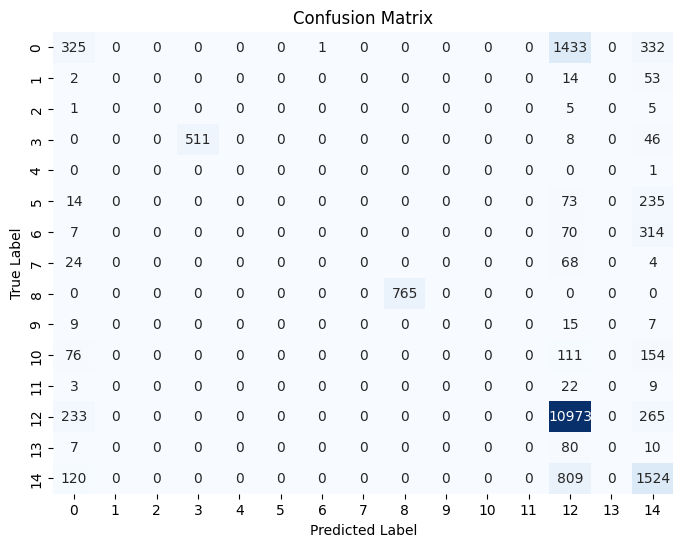

In [ ]:
plot_confusion_matrix(classifier_tfidf,X_test_vec,y_test)

### Random Forest Classifier - TF-IDF

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_multilabel_classification

In [49]:
def train_model_rf(X_train,y_train):
    rf_model = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
    rf_model.fit(X_train, y_train)
    return rf_model

In [ ]:
classifier_rf = train_model_rf(X_train_vec, y_train)

In [ ]:
accuracy_rf, report_rf = evaluate_model(classifier_rf, X_test_vec, y_test)
print(f"Accuracy: {accuracy_rf:.2f}")
print("Classification Report:\n", report_rf)

Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.09      0.15      2091
           1       0.91      0.30      0.46        69
          10       0.00      0.00      0.00        11
          11       1.00      0.91      0.95       565
          12       0.00      0.00      0.00         1
          13       0.81      0.08      0.14       322
          14       0.80      0.09      0.17       391
           2       0.78      0.07      0.13        96
           3       1.00      1.00      1.00       765
           4       1.00      0.03      0.06        31
           5       0.77      0.07      0.12       341
           6       0.00      0.00      0.00        34
           7       0.77      0.99      0.86     11471
           8       0.50      0.02      0.04        97
           9       0.59      0.55      0.57      2453

    accuracy                           0.76     18738
   macro avg       0.64      0.28      0.

/mnt/f/Rohan/Ubuntu_2204/virtual_env/india-ai/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/f/Rohan/Ubuntu_2204/virtual_env/india-ai/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/f/Rohan/Ubuntu_2204/virtual_env/india-ai/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [ ]:
save_model(classifier_rf,root_path+'/models/rf_model')

### Random Forest - Word2Vec

In [19]:
# from tqdm import tqdm
# import numpy as np

# input_text_embd = []
# max_length = 0
# for n in tqdm(range(len(input_textV1))):
#     texts = input_textV1[n]
#     embed = []
#     for text in word_tokenize(texts):
#         # Only proceed if the word is in the Word2Vec vocabulary
#         if text in word2vec.wv:
#             embed.extend(np.float32(word2vec.wv[text]))
#         else:
#             # Optionally, handle out-of-vocabulary words by appending a zero vector or skipping
#             embed.extend(np.zeros(word2vec.vector_size))  # Adjust if desired

#     # Check if embedding is non-empty; if empty, consider appending a zero vector for uniformity
#     if embed:
#         input_text_embd.append(embed)
#     else:
#         input_text_embd.append([0] * word2vec.vector_size)  # Zero vector if tokenization fails completely

#     max_length = max(max_length, len(embed))  # Update max_length if current sequence is longer


100%|██████████| 92431/92431 [00:54<00:00, 1701.41it/s]


In [17]:
X_train, X_test, y_train, y_test = preprocess_data(input_textV1, category_labelV1)

In [19]:
import nltk
import numpy
nltk.download('punkt')
w2v_model = word2vec_model(X_train)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
import numpy as np
words = set(w2v_model.wv.index_to_key)
X_train_vect = [[w2v_model.wv[i] for i in word_tokenize(ls) if i in words]
                         for ls in X_train]
X_test_vect = [np.array([w2v_model.wv[i] for i in word_tokenize(ls) if i in words])
                         for ls in X_test]

In [45]:
X_train_vect_avg = []
for v in X_train_vect:
    if np.array(v).size:
        X_train_vect_avg.append(np.array(v).mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))

X_test_vect_avg = []
for v in X_test_vect:
    if np.array(v).size:
        X_test_vect_avg.append(np.array(v).mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [87]:
# 1. Find the maximum length
max_len = max(len(x) for x in X_train_vect_avg)

# 2. Pad or truncate each sub-array to the maximum length
X_train_vect_avg_padded = [
    np.pad(x, (0, max_len - len(x)), 'constant') for x in X_train_vect_avg
]

In [90]:
rf_model = train_model_rf(X_train_vect_avg_padded, y_train)

KeyboardInterrupt: 